# 19-2 challenge Kth Nearest Neighbor

- Challenge: Implement the Nearest Neighbor algorithm

Code a Nearest Neighbors algorithm that works for two dimensional data. 

You can use either arrays or dataframes to do this. 

Test it against the SKLearn package on the music dataset from above to ensure that it's correct. 

The goal here is to confirm your understanding of the model and continue to practice your Python skills. We're just expecting a brute force method here. After doing this, look up "ball tree" methods to see a more performant algorithm design.


* Step 1: Calculate Euclidean Distance. Euclidean Distance = sqrt(sum i to N (x1_i – x2_i)^2)
* Step 2: Get Nearest Neighbors.
* Step 3: Make Predictions.

## KNN with credit score

classify whether a person of age 43 who borrowed a loan of $60,000 is going to repay the loan or default. Our labels are 1 for default and 0 for repay.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score

from sklearn import metrics


%matplotlib inline

In [9]:
# read in the iris data
#from sklearn.datasets import load_iris
#iris = load_iris()

# create X (features) and y (response)
#X = iris.data
#y = iris.target

## Load and read data

In [2]:
#read in the data using pandas
df = pd.read_csv('diabetes.csv')
#check data has been read in properly
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()*100/df.isnull().count() 

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

### Lets quickly plot the data

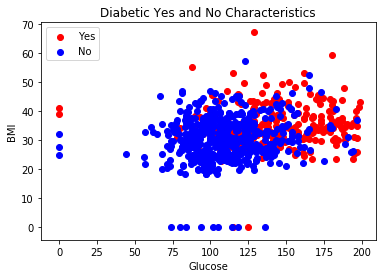

In [5]:
# Look at our data.
plt.scatter(
    #df[df['Outcome'] == 1].Age,
    df[df['Outcome'] == 1].Glucose,
    df[df['Outcome'] == 1].BMI,
    color='red'
)
plt.scatter(
    #df[df['Outcome'] == 0].Age,
    df[df['Outcome'] == 0].Glucose,
    df[df['Outcome'] == 0].BMI,
    color='blue'
)
plt.legend(['Yes', 'No'])
plt.title('Diabetic Yes and No Characteristics')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.show()

## Seperate Target variable: the outcome (diabetic) column

In [168]:
#create a dataframe with all training data except the target column
X = df.drop('Outcome', axis=1)
#check that the target variable has been removed
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


## Seperate target values

In [169]:
#separate target values
y = df['Outcome'].values
#view target values
y[0:5]

array([1, 0, 1, 0, 1])

## Create train and test data

In [170]:
#split dataset into train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

## Build and train KNN model
- to train - we will use the ‘fit’ function and pass in our training data as parameters to fit our model to the training data

In [171]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

## Test the model with test data

In [172]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0])

## Check the accuracy score

In [174]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)
print(metrics.accuracy_score(y_test, y_pred))

0.7012987012987013


#### 70% accuracy in prediction between y_test test data and the prediction
- can we make it better with K-fold cross validation? 

## Create KNN with k-Fold Cross-Validation

In [159]:
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=5)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.72727273 0.72727273 0.7012987  0.75816993 0.70588235]
cv_scores mean:0.723979288685171


## Test the new model 

In [183]:
knn_cv.fit(X_train,y_train)
y_cv_pred = knn.predict(X_test)
#y_cv_pred

## Check the accuracy score of prediction on the test data

In [178]:
#check accuracy of our model on the test data
knn_cv.score(X_test, y_test)
print(metrics.accuracy_score(y_test, y_pred))

0.7012987012987013


# MAGDA Question: 
- K fold validation does not change anything??? 
- why are they asking me to do this from scratch? do we ususally build KNN from scratch?